<a href="https://colab.research.google.com/github/cyss93/CP1_team8/blob/%EB%B0%95%EC%A3%BC%EC%98%81/retention_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
seller_3088 = pd.read_csv('/content/drive/MyDrive/olist/seller_3088.csv')
seller_379 = pd.read_csv('/content/drive/MyDrive/olist/seller_379.csv')

In [3]:
def retention(df,days,interval):
  date = list(range(interval,days+1,interval))
  df_X = df[df['registration_days']>=days]
  ret = [ len(df_X[df_X['sale_days']>=x-interval])/len(df_X) if ((len(df_X[df_X['sale_days']>=x])>0) and len(df_X)>0) else None for x in date ]
  return date, ret

# 3088명 데이터

데이터 개수 : 1261


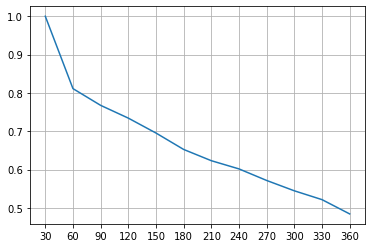

In [4]:
# 기본 retention

df = seller_3088
days = 365
interval = 30

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.grid(True)
ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])
print('데이터 개수 :', len(df[df['registration_days']>=days]))

데이터 개수 : 1261


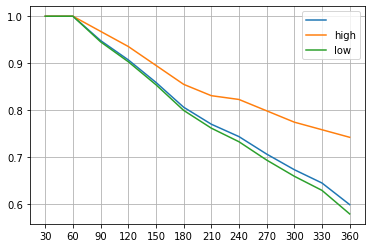

In [5]:
# 평균 매출에 따른 retention

df = seller_3088
days = 365
interval = 30
Minimum = 30   #  판매 일수가 아주 작으면 평균 매출이 높아져 결과가 왜곡 될 수 있다.

df_total = df[df['sale_days']>Minimum]
df_high = df[(df['mean_profit']>=df['mean_profit'].describe()['75%'])&(df['sale_days']>Minimum)]
df_low = df[(df['mean_profit']<df['mean_profit'].describe()['75%'])&(df['sale_days']>Minimum)]

plt.plot(retention(df_total,days,interval)[0],retention(df_total,days,interval)[1])
plt.plot(retention(df_high,days,interval)[0],retention(df_high,days,interval)[1])
plt.plot(retention(df_low,days,interval)[0],retention(df_low,days,interval)[1])
plt.legend(['', 'high', 'low'])
plt.grid(True)
ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])
print('데이터 개수 :', len(df[df['registration_days']>=days]))

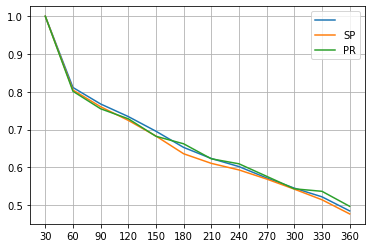

In [6]:
# 판매자 지역에 따른 retention

df = seller_3088
days = 365
interval = 30
variable = 'seller_state'

df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.grid(True)

# 379명 데이터

데이터 개수 : 117


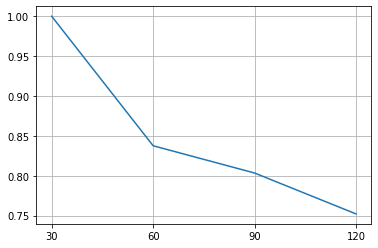

In [7]:
# 기본 retention

df = seller_379
days = 120
interval = 30

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.grid(True)
ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])
print('데이터 개수 :', len(df[df['registration_days']>=days]))

organic_search 데이터 개수 : 113
paid_search 데이터 개수 : 101


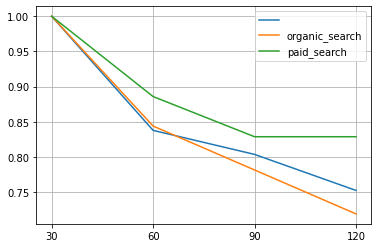

In [8]:
# 유입 방식에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'origin'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))

4b339f9567d060bcea4f5136b9f5949e 데이터 개수 : 70
068066e24f0c643eb1d089c7dd20cd73 데이터 개수 : 43


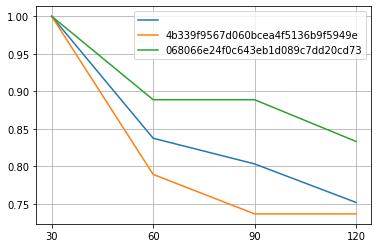

In [9]:
# 담당자에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'sdr_id'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))

4ef15afb4b2723d8f3d81e51ec7afefe 데이터 개수 : 75
d3d1e91a157ea7f90548eef82f1955e3 데이터 개수 : 41


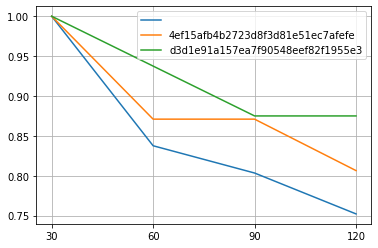

In [10]:
# 담당자(2)에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'sr_id'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))

health_beauty 데이터 개수 : 45
home_decor 데이터 개수 : 44


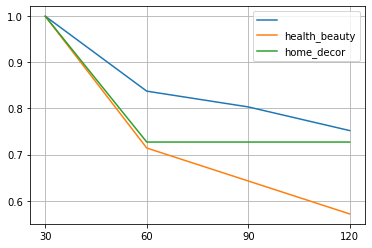

In [11]:
# 취급 품목에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'business_segment'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))

online_medium 데이터 개수 : 171
online_big 데이터 개수 : 79


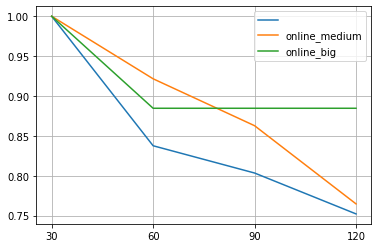

In [16]:
# 영업 형태에 따른 retention

df = seller_379
days = 120
interval = 30
variable = 'lead_type'


df_A = df[df[variable]==df[variable].value_counts().index[0]]
df_B = df[df[variable]==df[variable].value_counts().index[1]]

plt.plot(retention(df,days,interval)[0],retention(df,days,interval)[1])
plt.plot(retention(df_A,days,interval)[0],retention(df_A,days,interval)[1])
plt.plot(retention(df_B,days,interval)[0],retention(df_B,days,interval)[1])

ax = plt.subplot()
ax.set_xticks(retention(df,days,interval)[0])

plt.legend(['', df[variable].value_counts().index[0], df[variable].value_counts().index[1]])
plt.grid(True)
print(f'{df[variable].value_counts().index[0]} 데이터 개수 :', len(df_A))
print(f'{df[variable].value_counts().index[1]} 데이터 개수 :', len(df_B))